In [133]:
# 发球局的分数
# 接发球局得分数
# 跑动距离
# 发球失误数

# match_id
# p1_points_won
# p2_points_won

In [134]:
# 熵权法
# 数据预处理，同时做一致化和归一化
# 发球局得分: if serve==self and point_victor==self: self.point_FaQiu+=1
# 接发球局得分: if serve!=self and point_victor==self: self.point_JieQiu+=1
# 跑动距离: self.d+=distance_run (记得归一化)
# 发球失误数: if serve==self: self.point_Error+=(double_fualt+serve_no) () 
point={'0':0,'1':1, '2':2 ,'3':3, '4':4, '5':5, '6':6, '7':7, '8':8,'9':9, '10':10, '11':11, '12':12, '15':1, '30':2, '40':3, 'AD':4}
## 数据预处理
import csv
filename='Wimbledon_featured_matches.csv'
l=[]
with open(filename,'r',encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # 计算变量值
        point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0) + int(row['p1_ace']) + int(row['p1_winner'])
        point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0) + int(row['p2_ace']) + int(row['p2_winner'])
        point_Jieqiu1 = 1 if int(row['server'])==2 and int(row['point_victor'])==1 else 0
        point_Jieqiu2 = 1 if int(row['server'])==1 and int(row['point_victor'])==2 else 0
        d1 = float(row['p1_distance_run'])
        d2 = float(row['p2_distance_run'])
        point_Error1 = int(row['p1_double_fault']) + (1 if int(row['server'])==1 and int(row['serve_no'])==2 else 0)
        point_Error2 = int(row['p2_double_fault']) + (1 if int(row['server'])==2 and int(row['serve_no'])==2 else 0)
        point_delta1 = int(point[row['p1_score']]-point[row['p2_score']])
        point_delta2 = int(point[row['p2_score']]-point[row['p1_score']])
        # 保存到列表
        l.append([int(row['match_id'][-4:]), point_Faqiu1, point_Faqiu2, 
                  point_Jieqiu1, point_Jieqiu2, 
                  d1, d2, 
                  point_Error1, point_Error2, 
                  point_delta1, point_delta2])
print(l)

[[1301, 0, 0, 0, 1, 6.0, 7.84, 1, 0, 0, 0], [1301, 1, 0, 0, 0, 5.253, 7.094, 0, 0, -1, 1], [1301, 0, 0, 0, 1, 13.8, 19.808, 0, 0, 0, 0], [1301, 2, 0, 0, 0, 51.108, 75.631, 0, 0, -1, 1], [1301, 3, 0, 0, 0, 0.649, 0.813, 0, 0, 0, 0], [1301, 0, 0, 0, 1, 5.291, 4.249, 1, 0, 1, -1], [1301, 3, 0, 0, 0, 6.817, 17.821, 0, 0, 0, 0], [1301, 0, 1, 0, 1, 17.503, 18.067, 1, 0, 1, -1], [1301, 1, 0, 0, 0, 34.489, 24.594, 0, 0, 0, 0], [1301, 1, 0, 0, 0, 21.235, 27.427, 0, 0, 1, -1], [1301, 0, 3, 0, 0, 5.785, 4.915, 0, 0, 0, 0], [1301, 0, 0, 1, 0, 19.744, 18.244, 0, 0, -1, 1], [1301, 0, 0, 1, 0, 26.013, 18.626, 0, 0, 0, 0], [1301, 0, 2, 0, 0, 10.667, 7.112, 0, 0, 1, -1], [1301, 0, 1, 0, 0, 3.399, 2.237, 0, 0, 0, 0], [1301, 0, 0, 1, 0, 5.3, 4.307, 0, 1, -1, 1], [1301, 0, 1, 0, 0, 5.245, 5.499, 0, 0, 0, 0], [1301, 0, 2, 0, 0, 15.194, 16.594, 0, 0, -1, 1], [1301, 3, 0, 0, 0, 0.899, 1.073, 0, 0, 0, 0], [1301, 1, 0, 0, 0, 18.088, 34.756, 0, 0, 1, -1], [1301, 0, 0, 0, 1, 7.288, 10.818, 0, 0, 2, -2], [1301, 1

In [135]:
## 数据标准化
## x= [i-min(x) / max(x)-min(x) for i in x]
import numpy as np
# 比赛号集合
matchid = list(set(np.array([i[0] for i in l])))
matchid.sort()
# print(matchid)
last_id = matchid[0]
index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
for item in l:
    if item[0] == last_id:
        if index1 == []:
            index1.append(item[1])
            index1.append(item[2])
            index2.append(item[3])
            index2.append(item[4])
            index3.append(item[5])
            index3.append(item[6])
            index4.append(item[7])
            index4.append(item[8])
            index5.append(item[9])
            index5.append(item[10])
        else:
            # 累积
            index1.append(index1[-2]+item[1])
            index1.append(index1[-2]+item[2])
            index2.append(index2[-2]+item[3])
            index2.append(index2[-2]+item[4])
            index3.append(index3[-2]+item[5])
            index3.append(index3[-2]+item[6])
            index4.append(index4[-2]+item[7])
            index4.append(index4[-2]+item[8])
            index5.append(index5[-2]+item[9])
            index5.append(index5[-2]+item[10])
    else:
        last_id = item[0]
        index1.append(item[1])
        index1.append(item[2])
        index2.append(item[3])
        index2.append(item[4])
        index3.append(item[5])
        index3.append(item[6])
        index4.append(item[7])
        index4.append(item[8])
        index5.append(item[9])
        index5.append(item[10])

# print(index1)
# print(index2)
# print(index3)
# print(index4)
# 数据归一化
index1 = np.array(index1)
index2 = np.array(index2)
index3 = np.array(index3)
index4 = np.array(index4)
index5 = np.array(index5)
indexNew1 = [(i-min(index1))/(max(index1)-min(index1)) for i in index1]
indexNew2 = [(i-min(index2))/(max(index2)-min(index2)) for i in index2]
indexNew5 = [(i-min(index5))/(max(index5)-min(index5)) for i in index5]
# 距离 发球失误是负指标，所以需要取max-x
indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
indexNew4 = [(max(index4)-i)/(max(index4)-min(index4)) for i in index4]
print(indexNew1)
print(indexNew2)
print(indexNew3)
print(indexNew4)
print(indexNew5)


[0.0, 0.0, 0.004484304932735426, 0.0, 0.004484304932735426, 0.0, 0.013452914798206279, 0.0, 0.026905829596412557, 0.0, 0.026905829596412557, 0.0, 0.04035874439461883, 0.0, 0.04035874439461883, 0.004484304932735426, 0.04484304932735426, 0.004484304932735426, 0.04932735426008968, 0.004484304932735426, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.026905829596412557, 0.04932735426008968, 0.03139013452914798, 0.04932735426008968, 0.03139013452914798, 0.04932735426008968, 0.03587443946188341, 0.04932735426008968, 0.04484304932735426, 0.06278026905829596, 0.04484304932735426, 0.06726457399103139, 0.04484304932735426, 0.06726457399103139, 0.04484304932735426, 0.07174887892376682, 0.04484304932735426, 0.07623318385650224, 0.04484304932735426, 0.07623318385650224, 0.04932735426008968, 0.07623318385650224, 0.053811659192825115, 0.07623318385650224, 0.06726457399103139, 0.07623318385650224, 0

In [136]:
num = len(indexNew1)
print(num)

14568


In [137]:
## 熵权法
import pandas as pd
#下面求指标比重
sigma_xij = [sum(indexNew1), sum(indexNew2), sum(indexNew3), sum(indexNew4), sum(indexNew5)]
indexP1 = [i/sigma_xij[0] if i/sigma_xij[0]!=0.0 else 1e-6 for i in indexNew1]
indexP2 = [i/sigma_xij[1] if i/sigma_xij[1]!=0.0 else 1e-6 for i in indexNew2]
indexP3 = [i/sigma_xij[2] if i/sigma_xij[2]!=0.0 else 1e-6 for i in indexNew3]
indexP4 = [i/sigma_xij[3] if i/sigma_xij[3]!=0.0 else 1e-6 for i in indexNew4]
indexP5 = [i/sigma_xij[4] if i/sigma_xij[4]!=0.0 else 1e-6 for i in indexNew5]
#求熵值Hi
#先算K值
k=1/ np.log(num)           #考察年度为九年
# print(k)
indexHj1  = (-k) * sum([pij*np.log(pij) for pij in indexP1])
indexHj2  = (-k) * sum([pij*np.log(pij) for pij in indexP2])
indexHj3  = (-k) * sum([pij*np.log(pij) for pij in indexP3])
indexHj4  = (-k) * sum([pij*np.log(pij) for pij in indexP4])
indexHj5  = (-k) * sum([pij*np.log(pij) for pij in indexP5])
allHj =[indexHj1, indexHj2, indexHj3, indexHj4, indexHj5]
all = np.mat([indexNew1, indexNew2, indexNew3, indexNew4, indexNew5]).T

print(allHj)

[0.9753416159565151, 0.9736053423179826, 0.9961778337761821, 0.9944882100052044, 0.9955517726295076]


In [138]:
indexHjs = pd.Series(allHj, index=['发球局的分数','接发球局得分数','跑动距离','发球失误数', '局内分差'], name='指标的熵值')
#下面求差异系数
index_bianyi=pd.Series([1-i for i in allHj], index=['发球局的分数','接发球局得分数','跑动距离','发球失误数','局内分差'], name='差异系数')
print(index_bianyi)
print()
print(indexHjs)

发球局的分数     0.024658
接发球局得分数    0.026395
跑动距离       0.003822
发球失误数      0.005512
局内分差       0.004448
Name: 差异系数, dtype: float64

发球局的分数     0.975342
接发球局得分数    0.973605
跑动距离       0.996178
发球失误数      0.994488
局内分差       0.995552
Name: 指标的熵值, dtype: float64


In [139]:
#下面计算指标权重
IndexWeight = index_bianyi / sum(index_bianyi)
IndexWeight.name = '指标权重'
print(IndexWeight)

发球局的分数     0.380324
接发球局得分数    0.407104
跑动距离       0.058952
发球失误数      0.085012
局内分差       0.068608
Name: 指标权重, dtype: float64


In [140]:
def impurse(datalist):
    #下面计算综合得分
    score = np.dot(datalist, IndexWeight)
    return score
print(impurse([2,3,4,1,2]))

def guiyihua(data):
    i1=data[0]
    i2=data[1]
    i3=data[2]
    i4=data[3]
    i5=data[4]
    i1 = [(i-min(i1))/(max(i1)-min(i1)) for i in i1]
    i2 = [(i-min(i2))/(max(i2)-min(i2)) for i in i2]
    i5 = [(i-min(i5))/(max(i5)-min(i5)) for i in i5]
    i3 = [(max(i3)-i)/(max(i3)-min(i3)) for i in i3]
    i4 = [(max(i4)-i)/(max(i4)-min(i4)) for i in i4]
    return np.array([i1,i2,i3,i4,i5]).T

2.439995388254324


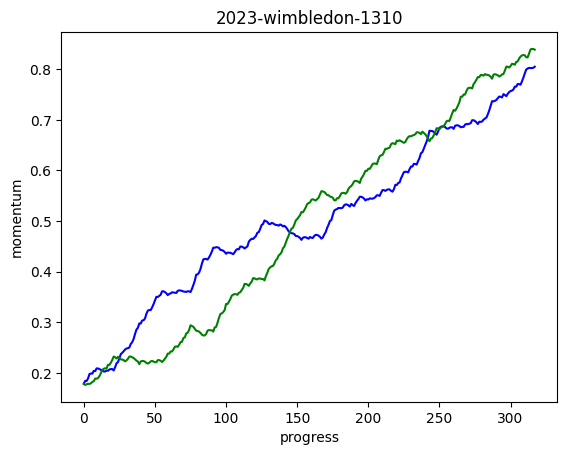

In [141]:
# 数据可视化
import matplotlib.pyplot as plt
import numpy as np
p1=[]
p2=[]
match=matchid[9]
for item in l:
    if item[0] == match:
        if p1 == []:
            p1.append([item[1],item[3],item[5],item[7],item[9]])
            p2.append([item[2],item[4],item[6],item[8],item[10]])
        else:
            # 累积
            p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7], p1[-1][4]+item[9]])
            p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8], p2[-1][4]+item[10]])
# 按列归一化
p1 = guiyihua(np.array(p1).T)
p2 = guiyihua(np.array(p2).T)

p1_impurse = [impurse(i) for i in p1]
p2_impurse = [impurse(i) for i in p2]
x = np.arange(0, len(p1_impurse))
plt.plot(x,p1_impurse,color = 'b',label="player1")#s-:方形
plt.plot(x,p2_impurse,color = 'g',label="player2")#o-:圆形
plt.xlabel("progress")#横坐标名字
plt.ylabel("momentum")#纵坐标名字
plt.title("2023-wimbledon-"+str(match))
# plt.legend(loc = "best")#图例
plt.show()


In [145]:
data = []

for match in matchid:
    result = 0
    p1=[]
    p2=[]
    for k,item in enumerate(l):
        if item[0] == match:
            if p1 == []:
                p1.append([item[1],item[3],item[5],item[7],item[9]])
                p2.append([item[2],item[4],item[6],item[8],item[10]])
            else:
                # 累积
                p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7], p1[-1][4]+item[9]])
                p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8], p2[-1][4]+item[10]])
        if k == len(l)-1:
            if item[9]==1:
                result = 1
            else:
                result = 2
        else: 
            if l[k+1][0] != match:
                if item[9]==1:
                    result = 1
                else:
                    result = 2
        print(p1)
        print(result)
    # 按列归一化
    p1 = guiyihua(np.array(p1).T)
    p2 = guiyihua(np.array(p2).T)
    data.append([impurse(p1[-1]),impurse(p2[-1]),result,match])
# print(data)


[[0.854575976124023, 0.7888872848494659, 1, 1301], [0.7874275361544758, 0.8560357248190132, 1, 1302], [0.7874275361544758, 0.8560357248190132, 1, 1303], [0.8543623543637806, 0.7891009066097083, 1, 1304], [0.8560357248190132, 0.7874275361544758, 1, 1305], [0.8453896265779643, 0.7980736343955246, 1, 1306], [0.8560357248190132, 0.7874275361544758, 1, 1307], [0.8092574143659195, 0.8342058466075695, 1, 1308], [0.8560357248190132, 0.7874275361544758, 1, 1309], [0.8048702959844429, 0.838592964989046, 1, 1310], [0.7874275361544758, 0.8560357248190132, 1, 1311], [0.8560357248190132, 0.7874275361544758, 1, 1312], [0.8560357248190132, 0.7874275361544758, 1, 1313], [0.8560357248190132, 0.7874275361544758, 1, 1314], [0.8136600788791518, 0.8298031820943371, 1, 1315], [0.7957078347864026, 0.8477554261870863, 1, 1316], [0.8560357248190132, 0.7874275361544758, 1, 1401], [0.7929604545951643, 0.8505028063783246, 1, 1402], [0.8560357248190132, 0.7874275361544758, 1, 1403], [0.8199261518376777, 0.823537109